In [10]:
import time
import random
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import os

from selenium import webdriver
from selenium.webdriver.common.by import By

In [19]:
chromeOptions = webdriver.ChromeOptions()
prefs = {"download.default_directory" : os.getcwd()}
chromeOptions.add_experimental_option("prefs",prefs)
# chromedriver = "path/to/chromedriver.exe"
# driver = webdriver.Chrome(executable_path=chromedriver, options=chromeOptions)
driver = webdriver.Chrome(options=chromeOptions)

driver.get("https://sistemaswebb3-listados.b3.com.br/indexPage/day/IBOV?language=pt-br")

btn_download = driver.find_element(By.CSS_SELECTOR,".primary-text > a:nth-child(1)") 
btn_download.click()

time.sleep(3)

driver.close()

In [25]:
df = pd.read_csv('./IBOVDia_18-06-24.csv', sep=';', skiprows=1, encoding='latin-1')
df.head()

,Código,Ação,Tipo,Qtde. Teórica,Part. (%)
RRRP3,3R PETROLEUM,ON NM,238.441.689,"0,310",NaN
ALOS3,ALLOS,ON NM,532.616.595,"0,561",NaN
ALPA4,ALPARGATAS,PN N1,166.362.038,"0,076",NaN
ABEV3,AMBEV S/A,ON,4.394.245.879,"2,518",NaN
ARZZ3,AREZZO CO,ON NM,62.305.891,"0,160",NaN


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88 entries, RRRP3 to Redutor
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Código         86 non-null     object 
 1   Ação           86 non-null     object 
 2   Tipo           88 non-null     object 
 3   Qtde. Teórica  87 non-null     object 
 4   Part. (%)      0 non-null      float64
dtypes: float64(1), object(4)
memory usage: 4.1+ KB


In [29]:
df.index[:-2]

Index(['RRRP3', 'ALOS3', 'ALPA4', 'ABEV3', 'ARZZ3', 'ASAI3', 'AZUL4', 'B3SA3',
       'BBSE3', 'BBDC3', 'BBDC4', 'BRAP4', 'BBAS3', 'BRKM5', 'BRFS3', 'BPAC11',
       'CRFB3', 'CCRO3', 'CMIG4', 'CIEL3', 'COGN3', 'CPLE6', 'CSAN3', 'CPFE3',
       'CMIN3', 'CVCB3', 'CYRE3', 'DXCO3', 'ELET3', 'ELET6', 'EMBR3', 'ENGI11',
       'ENEV3', 'EGIE3', 'EQTL3', 'EZTC3', 'FLRY3', 'GGBR4', 'GOAU4', 'NTCO3',
       'SOMA3', 'HAPV3', 'HYPE3', 'IGTI11', 'IRBR3', 'ITSA4', 'ITUB4', 'JBSS3',
       'KLBN11', 'RENT3', 'LREN3', 'LWSA3', 'MGLU3', 'MRFG3', 'BEEF3', 'MRVE3',
       'MULT3', 'PCAR3', 'PETR3', 'PETR4', 'RECV3', 'PRIO3', 'PETZ3', 'RADL3',
       'RAIZ4', 'RDOR3', 'RAIL3', 'SBSP3', 'SANB11', 'SMTO3', 'CSNA3', 'SLCE3',
       'SUZB3', 'TAEE11', 'VIVT3', 'TIMS3', 'TOTS3', 'TRPL4', 'UGPA3', 'USIM5',
       'VALE3', 'VAMO3', 'VBBR3', 'VIVA3', 'WEGE3', 'YDUQ3'],
      dtype='object')

In [30]:
ativos = list(df.index[:-2])
ativos = map(lambda x: f"{x}.SA", ativos)
ativos_sa = " ".join(list(ativos))

ativos_sa

'RRRP3.SA ALOS3.SA ALPA4.SA ABEV3.SA ARZZ3.SA ASAI3.SA AZUL4.SA B3SA3.SA BBSE3.SA BBDC3.SA BBDC4.SA BRAP4.SA BBAS3.SA BRKM5.SA BRFS3.SA BPAC11.SA CRFB3.SA CCRO3.SA CMIG4.SA CIEL3.SA COGN3.SA CPLE6.SA CSAN3.SA CPFE3.SA CMIN3.SA CVCB3.SA CYRE3.SA DXCO3.SA ELET3.SA ELET6.SA EMBR3.SA ENGI11.SA ENEV3.SA EGIE3.SA EQTL3.SA EZTC3.SA FLRY3.SA GGBR4.SA GOAU4.SA NTCO3.SA SOMA3.SA HAPV3.SA HYPE3.SA IGTI11.SA IRBR3.SA ITSA4.SA ITUB4.SA JBSS3.SA KLBN11.SA RENT3.SA LREN3.SA LWSA3.SA MGLU3.SA MRFG3.SA BEEF3.SA MRVE3.SA MULT3.SA PCAR3.SA PETR3.SA PETR4.SA RECV3.SA PRIO3.SA PETZ3.SA RADL3.SA RAIZ4.SA RDOR3.SA RAIL3.SA SBSP3.SA SANB11.SA SMTO3.SA CSNA3.SA SLCE3.SA SUZB3.SA TAEE11.SA VIVT3.SA TIMS3.SA TOTS3.SA TRPL4.SA UGPA3.SA USIM5.SA VALE3.SA VAMO3.SA VBBR3.SA VIVA3.SA WEGE3.SA YDUQ3.SA'

In [31]:
yf.pdr_override()

yfinance: pandas_datareader support is deprecated & semi-broken so will be removed in a future verison. Just use yfinance.


In [33]:
cotacoes_ativos = yf.download(tickers=ativos_sa, period='1y')

[*********************100%%**********************]  86 of 86 completed


In [34]:
cotacoes_ativos['Adj Close'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2023-06-19 to 2024-06-18
Data columns (total 86 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ABEV3.SA   250 non-null    float64
 1   ALOS3.SA   164 non-null    float64
 2   ALPA4.SA   250 non-null    float64
 3   ARZZ3.SA   250 non-null    float64
 4   ASAI3.SA   250 non-null    float64
 5   AZUL4.SA   250 non-null    float64
 6   B3SA3.SA   250 non-null    float64
 7   BBAS3.SA   250 non-null    float64
 8   BBDC3.SA   250 non-null    float64
 9   BBDC4.SA   250 non-null    float64
 10  BBSE3.SA   250 non-null    float64
 11  BEEF3.SA   250 non-null    float64
 12  BPAC11.SA  250 non-null    float64
 13  BRAP4.SA   250 non-null    float64
 14  BRFS3.SA   250 non-null    float64
 15  BRKM5.SA   250 non-null    float64
 16  CCRO3.SA   250 non-null    float64
 17  CIEL3.SA   250 non-null    float64
 18  CMIG4.SA   250 non-null    float64
 19  CMIN3.SA   250 non-null    floa

In [35]:
cotacoes_ativos_fechamento = cotacoes_ativos['Adj Close']

In [38]:
cotacoes_ativos_fechamento.dropna(how='all', inplace=True)
cotacoes_ativos_fechamento.dropna(axis=1, inplace=True, thresh=248)

C:\Users\paulo.neves\AppData\Local\Temp\ipykernel_8864\2509922698.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cotacoes_ativos_fechamento.dropna(how='all', inplace=True)
C:\Users\paulo.neves\AppData\Local\Temp\ipykernel_8864\2509922698.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cotacoes_ativos_fechamento.dropna(axis=1, inplace=True, thresh=248)


In [40]:
percentual_alteracao = cotacoes_ativos_fechamento.pct_change()
percentual_alteracao

Ticker,ABEV3.SA,ALPA4.SA,ARZZ3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,...,TRPL4.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VAMO3.SA,VBBR3.SA,VIVA3.SA,VIVT3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2023-06-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-21,3.657353,-3.243040,0.304647,-0.130254,-0.007874,0.291822,-160.132973,4.491451,-1.997687,-6.503326,...,-1.315429,-0.452702,-0.169645,-0.610057,-0.745048,1.088266,6.239330,-4.098646,-0.292031,0.889056
2023-06-22,0.910915,-3.069516,-1.589506,-1.568445,-4.326743,3.918928,-1.603604,-3.436576,10.276666,-0.547115,...,1.291993,-2.454671,-0.100140,-0.465207,-0.641765,-0.293998,-2.126247,-3.918146,-0.898624,-1.343826
2023-06-23,-1.218365,-0.774455,-1.892040,-24.570395,-1.090078,-1.538929,-1.020602,-0.849127,-0.520834,2.993461,...,-4.962584,-1.000000,-1.126388,0.871174,4.359329,-0.471019,-1.643895,-1.255884,-5.005339,4.079862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-12,1.178041,-1.654170,-1.387273,-3.840486,-1.649498,-3.485774,-2.716795,-5.580050,-4.410006,-2.928030,...,-10.987785,-5.051325,-1.988780,8.347094,7.042452,-3.235178,-7.214460,-1.825498,-28.001422,-1.439427
2024-06-13,0.400598,0.603361,-1.000000,0.169495,-0.589246,1.164092,-1.358307,-0.866908,-1.042457,-1.130256,...,-1.877212,-0.861169,-2.390600,-1.832905,0.044320,-0.574850,-0.529934,-0.414061,0.287095,-0.638449
2024-06-14,-1.846855,-0.248084,inf,-1.399083,-0.191308,-1.935021,-1.365667,-4.342089,11.988977,-2.248534,...,0.294043,-1.335181,-0.820975,-1.300899,-2.340671,-1.289589,-2.106756,-2.759765,-0.009099,0.607072


In [41]:
percentual_acumulado = (1 + percentual_alteracao).cumprod()
percentual_acumulado.iloc[0] = 1
percentual_acumulado

c:\Users\paulo.neves\AppData\Local\pypoetry\Cache\virtualenvs\unicesumar-python-avancado-hpnoA3aI-py3.12\Lib\site-packages\numpy\_core\fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


Ticker,ABEV3.SA,ALPA4.SA,ARZZ3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,...,TRPL4.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VAMO3.SA,VBBR3.SA,VIVA3.SA,VIVT3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2023-06-19,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2023-06-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-21,4.657353,-2.243040,1.304647,0.869746,0.992126,1.291822,-159.132973,5.491451,-0.997687,-5.503326,...,-0.315429,0.547298,0.830355,0.389943,0.254952,2.088266,7.239330,-3.098646,0.707969,1.889056
2023-06-22,8.899803,4.642007,-0.769097,-0.494403,-3.300548,6.354380,96.053364,-13.380336,-11.250579,-2.492376,...,-0.722961,-0.796138,0.747203,0.208539,0.091333,1.474320,-8.153273,9.042302,0.071771,-0.649507
2023-06-23,-1.943408,1.046980,0.686066,11.653274,0.297305,-3.424560,-1.978876,-2.018732,-5.390899,-9.953207,...,2.864793,-0.000000,-0.094438,0.390213,0.489482,0.779887,5.249855,-2.313785,-0.287466,-3.299403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-24.827061,NaN,NaN,NaN
2024-06-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-11.670353,NaN,NaN,NaN
2024-06-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.916231,NaN,NaN,NaN


In [50]:
carteira = random.choices(percentual_acumulado.columns, k=5)
carteira

['SLCE3.SA', 'UGPA3.SA', 'EGIE3.SA', 'PCAR3.SA', 'CSNA3.SA']

In [51]:
carteira_ativos = percentual_acumulado.loc[:, carteira]
carteira_ativos = 1000 * carteira_ativos
carteira_ativos['saldo'] = carteira_ativos.sum(axis=1)
carteira_ativos['retorno'] = carteira_ativos['saldo'].pct_change()
carteira_ativos

Ticker,SLCE3.SA,UGPA3.SA,EGIE3.SA,PCAR3.SA,CSNA3.SA,saldo,retorno
Date,,,,,,,
2023-06-19,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,5000.000000,NaN
2023-06-20,NaN,NaN,NaN,NaN,NaN,0.000000,-1.000000
2023-06-21,-351.855823,547.297566,173.042336,-5416.910207,204.570299,-4843.855829,-inf
2023-06-22,-1604.175171,-796.137718,-821.186211,1364.169196,685.043352,-1172.286551,-0.757985
2023-06-23,7708.194708,-0.000000,3602.281383,2822.421654,104.354949,14237.252695,-13.144857
...,...,...,...,...,...,...,...
2024-06-12,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
2024-06-13,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
2024-06-14,NaN,NaN,NaN,NaN,NaN,0.000000,NaN


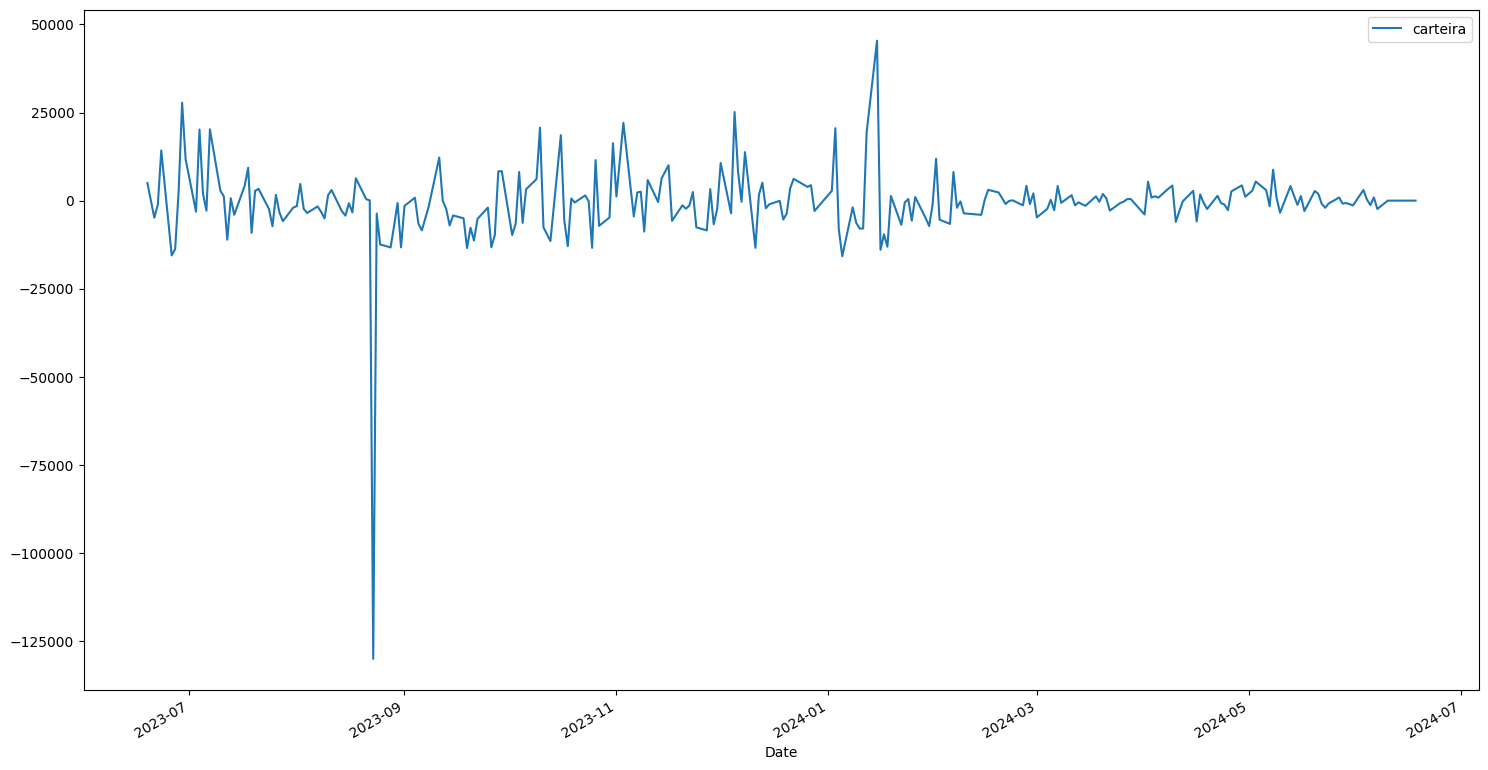

In [52]:
carteira_ativos['saldo'].plot(figsize=(18, 10), label='carteira')
plt.legend()